In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Removing features that very low in feature importance scale consistently.

In [2]:
df= pd.read_csv('Dataset_A3B_OH_343.csv')

In [3]:
df2=df.iloc[0:69,1:38]
df2 = df2.drop(columns=['M-Enth.atom', 
                        'M-Elec.-ve', 'M-Surface.E', 'M-Group','M-M.P', 
                        
                         'Elec.-ve', 'cova .radii', 'At.radii',
                        'Group',  'Work F.', 'OH_B.E']) 
df2

,M-At No.,M-At wt.,M-Density,M-B.P,M-Enth.fus,M-Enth.vap,M-Sp.ht Cap,M-1st Ion E,M-cova .radii,M-At.radii,...,M.P,B.P,Enth.fus,Enth.atom,Enth.vap,Sp.ht Cap,Surface.E,1st Ion E,Period,Elec.Aff
0,79,196.96,19.30,3129,12.5,330,129.1,890.13,136,174,...,1728.00,3186,17.20,431,378,445.0,1.92,737.10,4,112.0
1,79,196.96,19.30,3129,12.5,330,129.1,890.13,136,174,...,692.68,1180,7.35,131,119,388.0,0.33,906.40,4,-58.0
2,79,196.96,19.30,3129,12.5,330,129.1,890.13,136,174,...,2607.00,4423,25.70,652,580,238.0,2.60,710.20,5,101.3
3,79,196.96,19.30,3129,12.5,330,129.1,890.13,136,174,...,2237.00,3968,21.70,556,495,240.0,1.98,719.70,5,109.7
4,79,196.96,19.30,3129,12.5,330,129.1,890.13,136,174,...,1828.05,3236,16.70,377,380,240.0,1.36,804.40,5,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,77,192.22,22.56,4701,26.0,560,131.0,880.00,137,180,...,3459.00,5869,33.00,776,705,137.0,2.57,760.00,6,14.5
65,77,192.22,22.56,4701,26.0,560,131.0,880.00,137,180,...,3306.00,5285,31.00,789,630,130.0,2.95,840.00,6,106.1
66,77,192.22,22.56,4701,26.0,560,131.0,880.00,137,180,...,2041.40,4098,20.00,565,490,133.0,1.49,870.00,6,205.3
67,77,192.22,22.56,4701,26.0,560,131.0,880.00,137,180,...,1337.33,3129,12.50,368,330,129.1,0.74,890.13,6,222.8


In [4]:
print(df2.columns.tolist())

['M-At No.', 'M-At wt.', 'M-Density', 'M-B.P', 'M-Enth.fus', 'M-Enth.vap', 'M-Sp.ht Cap', 'M-1st Ion E', 'M-cova .radii', 'M-At.radii', 'M-Period', 'M-Work F.', 'M-Elec.Aff', 'At No.', 'At wt.', 'Density', 'M.P', 'B.P', 'Enth.fus', 'Enth.atom', 'Enth.vap', 'Sp.ht Cap', 'Surface.E', '1st Ion E', 'Period', 'Elec.Aff']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [6]:
pca = PCA(n_components=26)  # You can start by setting the number of components equal to the original feature set
pca.fit(X_scaled)

PCA(n_components=26)

In [7]:
X_pca = pca.fit_transform(X_scaled)  # Perform both fitting and transformation

# Retrieve cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

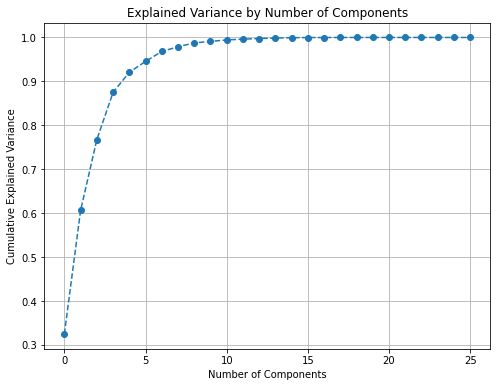

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(0, 26), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [9]:
variance_threshold = 0.95
n_components = np.argmax(explained_variance >= variance_threshold) + 1
print(f"Number of components to explain {variance_threshold * 100}% variance: {n_components}")

Number of components to explain 95.0% variance: 7


In [10]:
s = pd.DataFrame(X_scaled)
s

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.741098,0.732023,0.268391,-1.091952,-1.487634,-1.371946,-0.617364,1.006588,0.043781,0.098959,...,-0.096082,-0.236866,-0.028249,-0.117547,-0.130462,1.434508,0.276972,-0.176862,-1.234456,0.295111
1,0.741098,0.732023,0.268391,-1.091952,-1.487634,-1.371946,-0.617364,1.006588,0.043781,0.098959,...,-1.371079,-2.053345,-1.251163,-1.792164,-1.822392,0.978669,-1.447579,1.621545,-1.234456,-2.167296
2,0.741098,0.732023,0.268391,-1.091952,-1.487634,-1.371946,-0.617364,1.006588,0.043781,0.098959,...,0.986408,0.883265,1.027057,1.116088,1.189113,-0.220907,1.014516,-0.462610,-0.034773,0.140124
3,0.741098,0.732023,0.268391,-1.091952,-1.487634,-1.371946,-0.617364,1.006588,0.043781,0.098959,...,0.530752,0.471252,0.530442,0.580210,0.633847,-0.204913,0.342049,-0.361695,-0.034773,0.261796
4,0.741098,0.732023,0.268391,-1.091952,-1.487634,-1.371946,-0.617364,1.006588,0.043781,0.098959,...,0.027130,-0.191590,-0.090326,-0.418978,-0.117397,-0.204913,-0.330417,0.538039,-0.034773,-0.549350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.639031,0.643559,0.895495,0.777336,0.879519,0.749537,-0.600665,0.845963,0.147950,0.624205,...,2.035647,2.192651,1.933379,1.808263,2.005682,-1.028622,0.981977,0.066396,1.164909,-1.117152
65,0.639031,0.643559,0.895495,0.777336,0.879519,0.749537,-0.600665,0.845963,0.147950,0.624205,...,1.847227,1.663826,1.685071,1.880829,1.515741,-1.084602,1.394134,0.916204,1.164909,0.209651
66,0.639031,0.643559,0.895495,0.777336,0.879519,0.749537,-0.600665,0.845963,0.147950,0.624205,...,0.289871,0.588970,0.319381,0.630449,0.601184,-1.060611,-0.189416,1.234882,1.164909,1.646538
67,0.639031,0.643559,0.895495,0.777336,0.879519,0.749537,-0.600665,0.845963,0.147950,0.624205,...,-0.577192,-0.288481,-0.611772,-0.469216,-0.444024,-1.091800,-1.002884,1.448715,1.164909,1.900021


In [11]:
pca=PCA(n_components=7)

In [12]:
pca.fit(X_scaled)

PCA(n_components=7)

In [13]:
x_pca=pca.transform(X_scaled)

In [14]:
x_pca.shape

(69, 7)

In [15]:
m = pd.DataFrame(x_pca)

In [16]:
m.columns = [f'Component_{i+1}' for i in range(7)]
m

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7
0,0.598253,-2.037993,-0.427601,-2.714020,-1.087569,-1.499862,0.708982
1,1.861422,-4.553955,-1.524770,-0.620397,-2.112172,0.981141,2.288613
2,-1.018920,0.740050,-0.869040,-3.330385,0.140365,-1.337429,1.133840
3,-0.606531,0.019319,-1.334230,-2.511368,-0.117563,-1.368820,1.148741
4,-0.030131,-1.076791,-1.828626,-1.577666,-0.785961,-0.380599,1.669615
...,...,...,...,...,...,...,...
64,-4.385143,3.018975,-0.026470,-1.585267,1.435851,1.356691,-0.004392
65,-4.350848,3.170467,-0.453735,-1.165824,0.179617,1.016197,-0.708647
66,-3.329473,1.530552,-1.771781,1.053563,-0.704409,0.054232,-1.276951
67,-2.492474,0.078619,-2.491446,2.461301,-1.161536,0.026276,-1.241395


In [17]:
m.to_csv('PCA_add_7.csv', index=False)

In [57]:
n = 156
new_df = m.iloc[n:]  #Comp_1 and Comp_2 for Cu_Pred
L = pd.DataFrame(new_df)
L

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7


In [58]:
L.to_csv('PCA_add_Cu_Pred.csv', index=False)

Positively correlated
